# Hybrid Cryptography
## Samuel Gregg, Jess Winterborne, Jack Roper, Candice Chon

# Introduction

In this project, we will briefly explore the world of Cryptography. Cryptography is critical in our modern world, from being used to secure text messages, emails, online banking, embedded within cars and used in an ever increasing number of day to day devices such as kettles, toasters, heating systems etc in the Internet of Things (IOT)

In this project, we develop functions to encrypt and decrypt messages using the Caesar and Vigenere ciphers which are two examples of extremely simple (unsecure) ciphers. We also delve into the workings of RSA, a cornerstone of internet security, and investigate its security via attempting to break it ourselves with our own implementation of the Pollard Rho method. 

We then get onto looking at a very simple example of a Hybrid Cryptosystem, which in practise is what is used in the real world. We encrypt our message using the symmetric Vigenere cipher, and encrypt our Vigenere keyword using RSA which is an asymmetric scheme. Now, in practise we have many, many, many additional security features we need to satisfy the basic security services, for example integrity, message authentication, nonrepudiation, availability, physical security etc, which in our project our model certainly does not cover, but it gives a flavour for the real world applications of this. After this, we adapt our hybrid system so it additionaly works with 2 grams.

Towards the end of the project, we develop a function to attempt to break our Vigenere cipher via Kasiski analysis. We also investigate the security of RSA compared to our Vigenere Cipher, and see what bit length we need for our RSA key for RSA to be as resistant to attack as our Vigenere cipher is to Kasiski analysis.

In [7]:
from number_theory_functions import gcd,gcd_ext # Here, we import modules commonly used throughout our code.
import itertools, re
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import re

## Question 1: 
In this question we will create functions to encrypt and decrypt messages with the Caesar and Vigenere ciphers. Our ciphers work on alphabetic characters. There are 26 possible keys for our Caesar cipher, but obviously one of these is the trivial shift, so is useless. For each character in the Vigenere key there are 26 possible choices, the lower case letters of the alphabet.
(Note: we can replace all the letters in the text with a symbol, and then once we've decrypted the message, feed it back into the string in place of the symbols. This preserves the punctuation and anything else in the correct places. Also, .lower will store which characters were in upper case)

### Caesar cipher:

In [3]:
def caesar_encrypt(key, message): # Key is integer, message is alphabetic characters (possibly including spaces)
    message = message.lower()
    Encrypted_Message = "" # String to store encrypted message.
    for i in message:
        if i == " ": # If we encounter a space:
            Encrypted_Message+=" " # Add a space to our encrypted message.
        else:
            Encrypted_Message+=chr(((ord(i) - 97 + key) % 26) + 97) # If not, find the integer representing the unicode character, add the key mod 26, and convert back to a unicode character.
    return Encrypted_Message # Once all characters are done, return the encrypted message.

def caesar_decrypt(key, message): # Key is an integer, message is encrypted ciphertext.
    Decrypted_Message = "" # String to store decrypted message.
    for i in message:
        if i == " ":
            Decrypted_Message+= " " # If a space, add a space to plaintext.
        else:
            Decrypted_Message+=chr(((ord(i) - 97 - key) % 26) + 97) # If not, find the integer representing the unicode character, subtract the key mod 26, and convert back to a unicode character.
    return Decrypted_Message # Return the plaintext.

Here, you can test out the Caesar cipher with randomly generated keys, on a fixed message from Chapter.txt. We also impement encryption and decryption to and from text files.

In [4]:
file = open('chapter.txt') # We open the text file to encrypt from it.
chapter = file.read() # Read the text file.
file.close()
text = " ".join(re.findall("[a-z]+",chapter.lower())) # Add the characters from a-z, or A-Z but first making them lower case.

key = randrange(26) #This picks a random key between 0 and 25
encrypt = caesar_encrypt(key,text[:900]) # Use our Caesar encryption function to encrypt our text.
print("Our entrypted message is:")
print("")
print(encrypt)
print("")
print("NOTE: This encrypted message has been written to the text file Encrypted Caesar chapter.txt")
print("")
file2 = open('Encrypted Caesar chapter.txt', 'w') # We implement encryption to a text file.
file2.write(encrypt)
file2.close()

file3 = open('Encrypted Caesar chapter.txt') # We decrypt from a text file.
ciphertext = file3.read()
plaintext = caesar_decrypt(key, ciphertext) # We decrypt our text file.
print("Our decrypted message is:")
print("")
print(plaintext) # We output the plaintext for the user.
print("")
print("NOTE: We have decrypted this message from the text file Encrypted Caesar chapter.txt")
print("")

file4 = open('Decrypted Caesar ciphertext.txt', 'w') # We decrypt to a text file.
file4.write(plaintext)
file4.close()
print("NOTE: This decrypted message has been written to to text file Decrypted Caesar ciphertext.txt")

Our entrypted message is:

sgd oqnidbs ftsdmadqf dannj ne z szkd ne svn bhshdr ax bgzqkdr chbjdmr sghr dannj hr enq sgd trd ne zmxnmd zmxvgdqd hm sgd tmhsdc rszsdr zmc lnrs nsgdq ozqsr ne sgd vnqkc zs mn bnrs zmc vhsg zklnrs mn qdrsqhbshnmr vgzsrndudq xnt lzx bnox hs fhud hs zvzx nq qd trd hs tmcdq sgd sdqlr ne sgd oqnidbs ftsdmadqf khbdmrd hmbktcdc vhsg sghr dannj nq nmkhmd zs vvv ftsdmadqf nqf he xnt zqd mns knbzsdc hm sgd tmhsdc rszsdr xnt vhkk gzud sn bgdbj sgd kzvr ne sgd bntmsqx vgdqd xnt zqd knbzsdc adenqd trhmf sghr dannj shskd z szkd ne svn bhshdr z rsnqx ne sgd eqdmbg qdunktshnm ztsgnq bgzqkdr chbjdmr qdkdzrd czsd izmtzqx dannj lnrs qdbdmskx toczsdc cdbdladq kzmftzfd dmfkhrg bgzqzbsdq rds dmbnchmf tse oqnctbdc ax itchsg anrr zmc czuhc vhcfdq rszqs ne sgd oqnidbs ftsdmadqf dannj z szkd ne svn bhshdr z szkd ne svn bhshdr z rsnqx ne sgd eqdmbg qdunktshnm ax bgzqkdr chbjdmr bnmsdmsr annj sgd ehqrs qdbzkkdc s

NOTE: This encrypted message has been written to the text file Encrypte

Above, we have cracked the Caeser cipher assuming we know the key that has been used. If you do not know this however, you could use a brute force method where you do all the possible 26 shifts and see which shift outputs English. The shift that does will be the plaintext, and the shift needed to generate this will be the key.

In [5]:
message = 'mabl bl t vtxlxk labymxw fxlltzx' # Our encrypted message.
letters = 'abcdefghijklmnopqrstuvwxyz' # The letters we have to choose from.

for key in range(26): # We have 26 possible keys to check.
    shifted = '' # Our potential plaintext.
    for char in message:
        if char in letters: # If ciphertext character in our cipher alphabet.
            num = letters.find(char) # Find the numerical position of the letter
            num = (num - key) % 26 # Find the shifted numerical position.
            shifted = shifted + letters[num] # Add shifted character to potential plaintext.
        else:
            shifted = shifted + char # If character not in cipher alphabet, just add to potential plaintext.
    print('Key #{}: {}'.format(key, shifted)) # Print out all possible shifts of ciphertext. User identifies the plaintext manually.

Key #0: mabl bl t vtxlxk labymxw fxlltzx
Key #1: lzak ak s uswkwj kzaxlwv ewkksyw
Key #2: kyzj zj r trvjvi jyzwkvu dvjjrxv
Key #3: jxyi yi q squiuh ixyvjut cuiiqwu
Key #4: iwxh xh p rpthtg hwxuits bthhpvt
Key #5: hvwg wg o qosgsf gvwthsr asggous
Key #6: guvf vf n pnrfre fuvsgrq zrffntr
Key #7: ftue ue m omqeqd eturfqp yqeemsq
Key #8: estd td l nlpdpc dstqepo xpddlrp
Key #9: drsc sc k mkocob crspdon wocckqo
Key #10: cqrb rb j ljnbna bqrocnm vnbbjpn
Key #11: bpqa qa i kimamz apqnbml umaaiom
Key #12: aopz pz h jhlzly zopmalk tlzzhnl
Key #13: znoy oy g igkykx ynolzkj skyygmk
Key #14: ymnx nx f hfjxjw xmnkyji rjxxflj
Key #15: xlmw mw e geiwiv wlmjxih qiwweki
Key #16: wklv lv d fdhvhu vkliwhg phvvdjh
Key #17: vjku ku c ecgugt ujkhvgf oguucig
Key #18: uijt jt b dbftfs tijgufe nfttbhf
Key #19: this is a caeser shifted message
Key #20: sghr hr z bzdrdq rghesdc ldrrzfd
Key #21: rfgq gq y aycqcp qfgdrcb kcqqyec
Key #22: qefp fp x zxbpbo pefcqba jbppxdb
Key #23: pdeo eo w ywaoan odebpaz iaoowca
Ke

From inspecting the above shifts manually we can see the key used is 19, as the corresponding output is a message in English.

### Vigenere Cipher:

In [3]:
def vigenere_encrypt(keyword, message): # A keyword is used for this cipher instead of a key.
    message2 = message.replace(" ", "") # We make a copy of the message, removing any spaces.
    Org_Mes = []
    for i in message: # Here, we add a space or the number corresponding to the letter in the message.
        if i == " ":
            Org_Mes.append(" ")
        else:
            Org_Mes.append(ord(i) - 97)
    Key_Num = []
    Encrypted_Message = "" # The encrypted message is an empty string initially.
    for i in keyword:
        Key_Num.append(ord(i) - 97) # For each keyword letter, find the corresponding number.
    Key_For_Char = []
    for j in range(0, len(message2)):
            Key_For_Char.append(Key_Num[j % len(Key_Num)]) # We iterate through the keyword to match characters in the plaintext.
    for k in range(0, len(message)):
        if message[k] == " ":
            Key_For_Char.insert(k, " ") # Adding spaces too.
    for l in range(0, len(Org_Mes)):
        if Org_Mes[l] == " ":
            Encrypted_Message += " " # Add spaces to our encrypted message if required.
        else:
            Encrypted_Message += chr(((Org_Mes[l] + Key_For_Char[l]) % 26) + 97) # Otherwise, add the character and keyword numbers together, mod 26 and convert back to a character for the ciphertext.
    return Encrypted_Message # Function returns the encrypted message.

def vigenere_decrypt(keyword, message): # Message here is ciphertext.
    message2 = message.replace(" ", "") # Copy message, but remvove all spaces.
    Org_Mes = []
    for i in message:
        if i == " ":
            Org_Mes.append(" ") # Keep a copy of the spaces, and convert the letters to their numbers.
        else:
            Org_Mes.append(ord(i) - 97)
    Key_Num = []
    Decrypted_Message = "" # Plaintext is initially a string.
    for i in keyword:
        Key_Num.append(ord(i) - 97) # Convert the keyword to numerical format.
    Key_For_Char = []
    for j in range(0, len(message2)):
            Key_For_Char.append(Key_Num[j % len(Key_Num)]) # Iterate through the keyword to get to the length of the message.
    for k in range(0, len(message)):
        if message[k] == " ": # Add in spaces when required.
            Key_For_Char.insert(k, " ")
    for l in range(0, len(Org_Mes)):
        if Org_Mes[l] == " ":
            Decrypted_Message += " " # Add the spaces to the encrypted message when required.
        else:
            Decrypted_Message += chr(((Org_Mes[l] - Key_For_Char[l]) % 26) + 97) # Otherwise, subtract the key from the message, mod 26, and convert back to the plaintext letter.
    return Decrypted_Message # Return the plaintext.   

You can test these encryption/decryption functions out yourself by inputting your chosen keyword, ensuring it is all one word and in lower case. The message that will be encrypted will be a constant piece of text from book.txt.

In [7]:
import re
file = open('book.txt') # Here, we open the text file book.txt to encrypt from it.
chapter = file.read()
text = " ".join(re.findall("[a-z]+",chapter.lower())) # We assign the text from the novel to the variable "text".

print("Please enter a keyword for encryption - only including lower case letters a-z:")
User_In = True
while User_In == True: # We have 26 possible choices for any character in the key. User must supply a valid key, if not they are prompted again.
    keyword = input()# The user enters their own choice of keyword for the vigenere encryption, after the onscreen prompt.
    for char in keyword:
        if char not in "abcdefghijklmnopqrstuvwxyz":
            User_In = False
    if User_In == False:
        User_In = True
    else:
        User_In = False        
print("")
encrypt = vigenere_encrypt(keyword,text[:1000]) # We only encrypt the first 1000 characters though.
print("Encrypted message using keyword:",keyword)
print("")
print(encrypt)
print("")
print("NOTE: This encrypted message has been written to the text file Encrypted Vigenere book.txt")
print("")
file2 = open('Encrypted Vigenere book.txt', 'w') # We encrypt to the text file.
file2.write(encrypt)
file2.close()

file3 = open('Encrypted Vigenere book.txt') # We decrypt from the text file.
ciphertext = file3.read()
plaintext = vigenere_decrypt(keyword, ciphertext) # We decrypt our text file.
print("Our decrypted message is:")
print("")
print(plaintext) # We output the plaintext for the user.
print("")
print("NOTE: We have decrypted this message from the text file Encrypted Vigenere book.txt")
print("")

file4 = open('Decrypted Vigenere book.txt', 'w') # We decrypt to the text file.
file4.write(plaintext)
file4.close()
print("NOTE: This decrypted message has been written to to text file Decrypted Vigenere book.txt")

Please enter a keyword for encryption - only including lower case letters a-z:
donk

Encrypted message using keyword: donk

wvr zucwofh tewsalhft oecbu rt cblrr kqr cbhxhnlqr lb xnxh ohcwsa dkwf oecbu lg syu huo xgr yi oairbr kqmjrhfr sq huo xbvdhr fddhrc dbq wrgg ywvrb soedv cs dks jyuzq kw bb mrgg kqr jswv nvpcfd qc eovhesfhvyqg jrdhfyhjrb bch wdm pysm vd jwio lh ngdm bb us hch wg eqrrb wvr dhfzc rt grh deymspd jigoqprbj zvmhbfo lbpvxrrn zwgr wvvc hpbyn ce yqzvxh og gzk tewsalhft yuu vp bch kus ayw zbmdhrn lb grh iaswsq cwogov mbe zwyv koio wc prhqx dks ykzg bp wvr mriadum jrhfr iri nbh zbmdhrn essyus hclbt dkwf oecbu wwgvh desgs nxg deomiqsfs newvbb moao difdhb eoosnch rndh xhxh soyry zyvh eofsadom hzgogog trluinbb znxjinqh saqowfr fvnbdqgou grd hbpygwaq xhs zucqefsq lb oayqmzyxg iyoiadhsec dbq ndjvn zwqqhf fddfg yi huo sfbthqg qxhrxeseq hpbyn desgs nxg deomiqsfs grhfr sv oa sozhcwfndhr rnlhvyq cs dkwf dlhyo zvvmk ani ywrghr nd hpbyn qbfhf cblrr kqr cbhxhnlqr lb xnxh ohcwsa mrbgoqhf

## Question 2:
Above, we tried to crack the Caesar cipher by brute force. This takes a lot of effort though from a processing point of view, especially if your message is really long. In this question, we will be cracking the encrypted Caesar cipher message by a technique called frequency analysis, which compares the frequency of letters in standard, plaintext English with that of our given ciphertext and uses statistical properties of the standard alphabet to immediately deduce the key used. Note, this method will only work with text sufficiently long though as otherwise we simply don't have enough ciphertext letters to get accurate statistical values to do a comparison with.

To get the distribution of letters in plain English, we will count the frequencies of letters in a book, and plot the results as a bar chart. This gives us an accurate representation of what the distribution of letters should be in the plaintext, and so we can compare this distributon with that of the distribution of letters in the ciphertext, and immediately deduce the key by matching the most common letter in the plaintext (e) with the most common letter in the ciphertext. The shift required for this will be the key for the encryption. Using this key with our Caesar decryption function, we can immediately decrypt the given ciphertext to reveal the plaintext.

These are the frequencies of letters in the text, book.txt,  which are representative of standard English:

{'a': 41788, 'b': 9103, 'c': 13549, 'd': 22339, 'e': 69587, 'f': 12014, 'g': 10047, 'h': 34158, 'i': 37819, 'j': 884, 'k': 3217, 'l': 21611, 'm': 14771, 'n': 37738, 'o': 40105, 'p': 8304, 'q': 628, 'r': 32411, 's': 33145, 't': 46781, 'u': 15021, 'v': 5732, 'w': 12321, 'x': 839, 'y': 12721, 'z': 936}



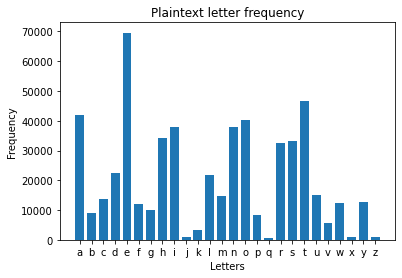

This is the encypted letter frequencies, of letters in Wuthering Heights,  to compare to the frequencies of those in book.txt:

{'a': 645, 'b': 643, 'c': 173, 'd': 10, 'e': 504, 'f': 584, 'g': 776, 'h': 274, 'i': 109, 'j': 167, 'k': 17, 'l': 170, 'm': 2, 'n': 690, 'o': 118, 'p': 237, 'q': 406, 'r': 1120, 's': 205, 't': 200, 'u': 503, 'v': 653, 'w': 15, 'x': 59, 'y': 374, 'z': 237}



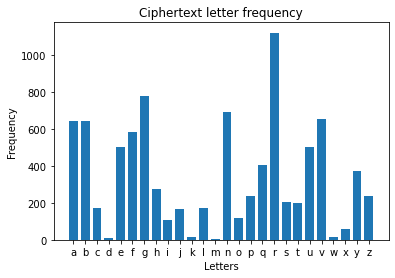

In [8]:
import re
file = open('book.txt') # We use book.txt to find the letter distribution in standard English.
chapter = file.read()
text = " ".join(re.findall("[a-z]+",chapter.lower())) # We find all lower case letters in the text file, and add them to the string.

file = open('message_wuthering_heights.txt') # Here, we open the text file we want to encrypt with our Caesar cipher.
chapter = file.read()
text1 = " ".join(re.findall("[a-z]+",chapter.lower())) # We assign the text from the novel to the variable "text1".

def freq_analysis(string): # We find the frequency of each letter in the book.
    letter_freq = {}
    for char in letters:
        letter_freq[char] = 0
    for char in string:
        if char in letters:
            letter_freq[char]+=1
    return letter_freq

def plot_distribution(letter_freq): # We plot a bar chart of the distribution.
    center = range(len(letters))
    plt.bar(letter_freq.keys(), letter_freq.values(), width = 0.75)
    plt.xlabel("Letters") # Label the axis.
    plt.ylabel("Frequency")
    plt.show # Show the bar chart to the user.

letterfreq = freq_analysis(text) # This is the dictionary holing the frequency of letters in our text, book.txt.
print('These are the frequencies of letters in the text, book.txt,  which are representative of standard English:')
print("")
print(letterfreq)
print()
plt.figure()
plot_distribution(letterfreq)
plt.title("Plaintext letter frequency")
plt.show() # Show the plaintext letter frequency to the users. Letters from book.txt.

encrypted_message = caesar_encrypt(13,text1) # Encrypt our text with a key of 13.
encryptedfreq = freq_analysis(encrypted_message) # Analysis the frequency of letter
print('This is the encypted letter frequencies, of letters in Wuthering Heights,  to compare to the frequencies of those in book.txt:')
print("")
print(encryptedfreq)
print()
plt.figure()
plot_distribution(encryptedfreq)
plt.title("Ciphertext letter frequency")
plt.show() # Show the ciphertext letter frequency to the user.

The bar charts show us that the frequencies for the standard English letters and the ciphertext are very similar, and it is very likely the most common letter in the ciphertext, which is r, represents the plaintext letter e. This shift is what we want to work out - it is the key. We show these dictionaries below:

In [9]:
letterfreq2 = dict(sorted(letterfreq.items(), key=lambda item: item[1],reverse=True)) # We show a dictionary of the frequencies of letters in book.txt, with the most frequent letters appearing first.
print(letterfreq2) # Show the user the dictionary of frequencies.
print('book.txt letter frequenices')
print()
encryptedfreq2 = dict(sorted(encryptedfreq.items(), key=lambda item: item[1],reverse=True)) # The same as above, but this time the dictionary is for the encrypted message.
print(encryptedfreq2) # Show this dictionary to the user also.
print('Ciphertext letter frequencies')
print()

{'e': 69587, 't': 46781, 'a': 41788, 'o': 40105, 'i': 37819, 'n': 37738, 'h': 34158, 's': 33145, 'r': 32411, 'd': 22339, 'l': 21611, 'u': 15021, 'm': 14771, 'c': 13549, 'y': 12721, 'w': 12321, 'f': 12014, 'g': 10047, 'b': 9103, 'p': 8304, 'v': 5732, 'k': 3217, 'z': 936, 'j': 884, 'x': 839, 'q': 628}
book.txt letter frequenices

{'r': 1120, 'g': 776, 'n': 690, 'v': 653, 'a': 645, 'b': 643, 'f': 584, 'e': 504, 'u': 503, 'q': 406, 'y': 374, 'h': 274, 'p': 237, 'z': 237, 's': 205, 't': 200, 'c': 173, 'l': 170, 'j': 167, 'o': 118, 'i': 109, 'x': 59, 'k': 17, 'w': 15, 'd': 10, 'm': 2}
Ciphertext letter frequencies



We can see the most frequent letter in the ciphertext is now r, so we very much suspect the message has been shifted by 13 (as r is 13 letters after e).
Now we will write a function that immediately decrypts the ciphertext, using the above frequency analysis.

In [10]:
max_plaintext_letter_num = ord(max(letterfreq2, key=letterfreq2.get)) - 97 # Find the numerical position of most frequent plaintext letter
max_ciphertext_letter_num = ord(max(encryptedfreq2, key=encryptedfreq2.get)) - 97 # And ciphertext letter.
key = (max_ciphertext_letter_num - max_plaintext_letter_num) % 26 # The difference between these two is the key, mod 26
plaintext = caesar_decrypt(key, encrypted_message) # Decrypt the message using the key found above, and our decryption function.
print(plaintext) # Output the plaintext to the user.

i have just returned from a visit to my landlord the solitary neighbour that i shall be troubled with this is certainly a beautiful country in all england i do not believe that i could have fixed on a situation so completely removed from the stir of society a perfect misanthropist s heaven and mr heathcliff and i are such a suitable pair to divide the desolation between us a capital fellow he little imagined how my heart warmed towards him when i beheld his black eyes withdraw so suspiciously under their brows as i rode up and when his fingers sheltered themselves with a jealous resolution still further in his waistcoat as i announced my name mr heathcliff i said a nod was the answer mr lockwood your new tenant sir i do myself the honour of calling as soon as possible after my arrival to express the hope that i have not inconvenienced you by my perseverance in soliciting the occupation of thrushcross grange i heard yesterday you had had some thoughts thrushcross grange is my own sir he

## Question 3:

In this question we will test the performance of the smallest factor function, from the lecture notes. We will generate random primes p, q initially 16 bits each, and find N = p * q. We will then input N into the smallest factor function, find the time taken by the algorithm for the input, an store the result. We will continue this procedure while the execution time is 15 minutes or less. Then using the data we have generated, we can easily plot the results to get a nice visual representation of our results. We can then conjecture at what bit length the use of our function becomes unfeasible.

In [13]:
from number_theory_functions import smallest_factor, gcd # We import several modules.
from miller_rabin import is_prime
from random import getrandbits
from time import perf_counter
from time import localtime, strftime #Use these only for testing purposes
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from numpy import linspace

smallest_factor_file = "Smallest Factor Time.txt" # This text file holds the smallest factor function execution times.

In [14]:
def get_prime(length = 16): #We generate a random prime of given bit length, initially 16.
    while True:
        candidate = getrandbits(length)
        candidate |= 1 << length - 1 | 1
        if is_prime(candidate):
            return candidate
        
def get_N(length = 16): #Returns the product N = p*q, where p, q are two primes of bit length "length".
    return get_prime(length) * get_prime(length)

In [15]:
def timer(func, output, time_limit = 60*15, verbose = True): # Our main function, finding the time of execution.
    result = open(output, 'a')
    result.write("New test done with time limit: {}s".format(time_limit)) # Writing our results to a text file.
    
    bit_length = 16 #Initial bit length of primes
    run_time = 0 #Initial run time of both smallest_factor and pollard_rho
    
    while run_time < time_limit: # We only do this for feasible times though.
        start = perf_counter()
        func(get_N(bit_length))
        run_time = perf_counter() - start
        res = "\nBit length: {} \t Run time: {}".format(bit_length, run_time) # The resulting execution time.
        
        if verbose: #Used to give elapsed time since last decomposition.
            print(res)
            t = localtime()
            current_time = strftime("%H:%M:%S", t)
            print(current_time)
            
        result.write(res) # Write the result to the text file.
        bit_length += 1
    
    result.write("\n\n") #Make log file more legible
    result.close()
    
    if verbose:
        print("\nEnd of test") # Show the user the test is complete.

In [16]:
time_length = 50*15 # 15 minutes as timer limit
epochs = 0 # Number of times to run each function, 10 is excessive (gives us a better approximation)
for i in range(epochs):
    timer(smallest_factor, smallest_factor_file, time_length) 

In [17]:
def get_data(file_name, smooth = True): # We retrieve the data from the text file for plotting.
    file = open(file_name, 'r')
    lines = file.readlines()
    file.close()
    values_dict = {} # We assign an empty dictionary to hold the retrieved data.
    
    for i in range(len(lines)): # We go through line by line.
        if "Bit length: " not in lines[i]:
            continue
        line = lines[i].split(":") # We split up the string with the execution time.
        bit_length_string = line[1].split("\t")
        bit_length = int(bit_length_string[0]) # The corresponding bit length.
        time = float(line[2]) # The corresponding time.
        if bit_length not in values_dict.keys():
            values_dict[bit_length] = [time]
        else:
            values_dict[bit_length].append(time)

    x_vals = list(values_dict.keys()) # The x values are the bit lengths.
    y_vals = [] # The y values are the corresponding execution times.
    for i in range(min(x_vals), max(x_vals) + 1):
        y_val = sum(values_dict[i]) / len(values_dict[i])
        y_vals.append(y_val)
    
    if smooth:
        return smoother(x_vals, y_vals)
    
    return x_vals, y_vals # We return these lists to be plotted.

def smoother(x_vals, y_vals, dim = 300): # We smooth our data out, to get a good graph that shows the important overall trends.
    x_smooth = linspace(min(x_vals), max(x_vals), dim) 
    spl = make_interp_spline(x_vals, y_vals)  # type: BSpline
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth # Returning our smoothed datasets.

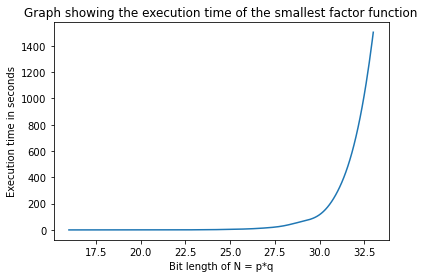

In [18]:
x_vals, y_vals = get_data(smallest_factor_file, True) # We retrieve our data from the text file.
plt.plot(x_vals, y_vals) # Plot the datasets against each other.
plt.title("Graph showing the execution time of the smallest factor function")
plt.xlabel("Bit length of N = p*q") # Add a title, and axis labels.
plt.ylabel("Execution time in seconds")
plt.show() # Show the graph to the user.

### Conjecture:
From the above graph of the execution time of the smallest factor function, we can conjecture that the function becomes unfeasible for bit lengths of p, q greater than approximately 32.

## Question 4:

In this question, we implement a function which can efficiently factor very large integers, called the Pollard rho method. We will then perform the same type of analysis of its efficiency as we have done above for the smallest factor function, and plot the results and compare this with the results for the smallest factor function. From this, we can then conjecture at what bit length the use of our function will become unfeasible. NOTE: We have used the information supplied in the pdf document, pollard_rho.pdf, to help us answer this question.

In [19]:
pollard_rho_file = "Pollard Rho Time.txt" # We store the results of execution times in this text file.

In [22]:
from number_theory_functions import gcd # We import the gcd function from the lecture.
def g(x, n): #Define the function for generating next xn in series
    return (x ** 2 + 1) % n

def pollard_rho(candidate): #Implementation of pollard rho as seen in the pdf.
    x = 2 #x, y chosen semi-arbitrarily, 2 seems to be a nice simple starting point
    y = 2
    d = 1
    while d == 1: # Main part of the algorithm:
        x = g(x, candidate)
        y = g(g(y, candidate), candidate) #y increases twice as fast as x
        d = gcd(abs(x - y), candidate)
    if d == candidate: #Candidate appears to be prime so gcd with it and any number is itself
        return False
    return d # Return a divisor of candidate.

In [23]:
time_length = 50*15 #15 minutes as timer limit
epochs = 0 # Number of times to run each function, 10 is excessive. Gives us a better approximation.
for i in range(epochs):
    timer(pollard_rho, pollard_rho_file, time_length)

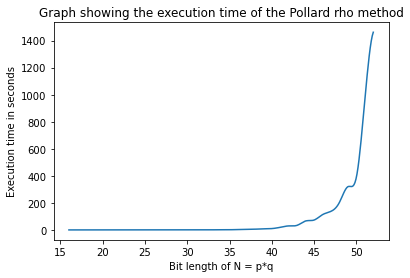

In [24]:
x_vals, y_vals = get_data(pollard_rho_file, True) # Retrieve the data on POllard rho from the text file.
plt.plot(x_vals, y_vals) # Plot the data.
plt.title("Graph showing the execution time of the Pollard rho method")
plt.xlabel("Bit length of N = p*q") # Add a title, and axis labels.
plt.ylabel("Execution time in seconds")
plt.show() # Show the result to the user.

As a comparison, we can join these two graphs together and view the results for the execution time of smallest factor and pollard rho together on one single graph:

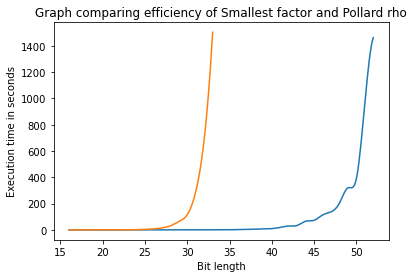

In [25]:
x_vals, y_vals = get_data(pollard_rho_file, True) # Pollard rho data.
x1_vals, y1_vals = get_data(smallest_factor_file, True) # Smallest factor data.
plt.plot(x_vals, y_vals) # Plot both sets of data together.
plt.plot(x1_vals, y1_vals)
plt.title("Graph comparing efficiency of Smallest factor and Pollard rho")
plt.xlabel("Bit length") # Add a title and axis labels.
plt.ylabel("Execution time in seconds")
plt.show() # Show the graph to the user.

### Conjecture:
From the above graph of the execution time of the Pollard rho method, we can conjecture that the function becomes unfeasible for bit lengths of p, q greater than approximately 50.

## Question 5:

Here, we will rewrite the conversion functions from lectures using only 5 bits to represent the letters and spaces. Since we only have 26 characters (or 27 if we include spaces), we can rewrite the characters in 5 bit binary from 0-26 inclusive. We can do this for individual characters, and then use our code for this to deal with converting strings to integers, which will be very useful for us in our hybrid system using RSA.

In [26]:
def conversion_letter(letter): #This is our function for a single letter
    if letter == ' ':
        num_represent = 26 # The number to represent a space.
    else:
        num_represent = ord(letter) - 97 # ord gives us the unicode number, but we need it to be between 0 and 25 inclusive.
    in_binary = bin(num_represent)[2:] # Binary equivelent.
    num_zeros = 5 - len(in_binary) #Now we have to make sure the binary string is 5 bits long
    for i in range(num_zeros):
        in_binary = '0' + in_binary # Add leading zeros if neccessary.
    return in_binary

def conversion_string(text): # We use the function above for a string now.
    #Returns an integer that encodes text - each character is a binary string of 5 bits. We simply concatenate for this.
    bin_string = '1' #We start with a leading 1 in case the first letter has a 0 at the beginning
    for letter in text:
        bin_string = bin_string + conversion_letter(letter) # Concatenate the binary strings, using the above function.
    return int(bin_string,2) # Return the corresponding integer.

def conversion_text(number): #Convert the integers back to characters. 
    #Remove '0b1' from the string 
    bin_string = bin(key_as_int)[3:]
    text=''
    for i in range(0,len(bin_string),5):
        #Pick out binary strings, 5 bits at a time
        byte_string = bin_string[i:i+5]
        #Convert byte_string to a character before appending it to text
        text = text + chr(int(byte_string,2)+ 97)
    return text 

## Question 6:

Here, we implement a very basic hybrid cryptosystem. We encrypt and decrypt our message using our Vigenere functions that we implemented above. But, we encrypt and decrypt the keyword used in this Vigenere encryption with RSA. For our message, we simply use the first 1000 lower case letters in the Wuthering Heights text file from blackboard, but this function works in general for any chosen text. In the real world of cryptography, this is the sort of model that is used in practise to secure communications, although two parties are involved in the entire process instead of just one like in our basic example.

In [8]:
from random import SystemRandom, randint # Here we import the required modules from the lectures.
from miller_rabin import is_prime
from conversion_functions import convert_to_integer,convert_to_text

file = open('message_wuthering_heights.txt') # We open a text file to encrypt.
chapter = file.read()
import re
text = " ".join(re.findall("[a-z]+",chapter.lower()))

print("Bob's plaintext message:")
print("")
print(text[:1000]) # We use the first 1000 characters of the text file as plaintext.
print("")
print("Please enter a keyword to encrypt this message via the Vigenere cipher, lowercase a-z only:")
print("")
User_In = True
while User_In == True: # We have 26 possible choices for any character in the key. User must supply a valid key, if not they are prompted again.
    keyword = input()# The user enters their own choice of keyword for the vigenere encryption, after the onscreen prompt.
    for char in keyword:
        if char not in "abcdefghijklmnopqrstuvwxyz":
            User_In = False
    if User_In == False:
        User_In = True
    else:
        User_In = False    
print("Bob's inputted keyword: " + keyword)
encrypt = vigenere_encrypt(keyword,text[:1000]) # Here, we encrypt the first 1000 characters of the text file.
print("Bob's Vigenere encrypted message is:\n")
print(encrypt) # We show the user the encrypted text.
print("")

def random_prime(bit_length): # We need to find two random 1024 bit prime numbers. Using function from the lectures.
    while True:
        p = SystemRandom().getrandbits(bit_length)  
        if is_prime(p):
            return p

def rsa_p_q(bit_length): # Here, we generate p and q, 1024 bit prime numbers.
    p = random_prime(bit_length)
    q = random_prime(bit_length)
    return (p,q)
(p,q) = rsa_p_q(1024)

def rsa_public_key(p,q, e = 65537): # We generate the public key here. It is the key pair (N, e). e is set to 65537 as a standard.
    N = p*q
    return (N,e)
(N,e) = rsa_public_key(p,q) # N = p * q
print("Alice's public key is (N,e) where:\n")
print("N = ")
print(N) # Outputting the public key for the user.
print("\ne = {}".format(e))
print("")

key = convert_to_integer(keyword) # Using the function from the lectures to get plaintext m as an integer.
print("")
print("Bob's keyword as an integer is ", key)

def rsa_encrypt(key, N, e):  
    return pow(key, e, N)
c = rsa_encrypt(key, N, e)
print("Bob has encrypted his integer keyword via RSA, which is:")
print("\nc = ")
print(c)
print("")

def modular_inverse(a,n): # Finds the modular inverse of a mod n.
        (g,x,y)=gcd_ext(a,n)
        if g==1:
            return x%n
        else:
            return None 
        if gcd(m,n)!=1:
            return None

def rsa_decrypt(c,p,q,N,e): 
    totient = N - (p + q) + 1       # This is (p-1)*(q-1)
    f = modular_inverse(e,totient)  # Note: f * e = 1 (mod totient)
    return pow(c,f,N) 
key_new = rsa_decrypt(c,p,q,N,e) # Returns integer format of the key
print("Now, we decrypt the key encrypted with RSA back to its integer format, shown above")
print("")
original_key = convert_to_text(key_new) # We use the lecture function convert_to_text to convert back to a keyword for Vigenere.
print("Alice has generated the original Vigenere cipher key now")
print("")
print("The result of Alice's decryption is as follows.")
print("Original Vigenere Key = ")
print("")
print(original_key) # SHow the user the original key.
print("")

decrypt = vigenere_decrypt(original_key,encrypt) # Decrypt the ciphertext with the key. 
print("Decrypted Vigenere message:")
print("")
print(decrypt) # Show the plaintext to the user again.

Bob's plaintext message:

i have just returned from a visit to my landlord the solitary neighbour that i shall be troubled with this is certainly a beautiful country in all england i do not believe that i could have fixed on a situation so completely removed from the stir of society a perfect misanthropist s heaven and mr heathcliff and i are such a suitable pair to divide the desolation between us a capital fellow he little imagined how my heart warmed towards him when i beheld his black eyes withdraw so suspiciously under their brows as i rode up and when his fingers sheltered themselves with a jealous resolution still further in his waistcoat as i announced my name mr heathcliff i said a nod was the answer mr lockwood your new tenant sir i do myself the honour of calling as soon as possible after my arrival to express the hope that i have not inconvenienced you by my perseverance in soliciting the occupation of thrushcross grange i heard yesterday you had had some thoughts thrushcro

## Question 7:

In this question, we will redesign our above system so that it will instead work on bigrams of letters, instead of single letters. A bigram is simply a string of 2 letters. For each letter in the alphabet, we will store several bigrams that represent the same letter. The main advantage of this type of system is that it disguises the frequencies of letters throught the ciphertext, so frequency analysis becomes very difficult. We will encode our plaintext with randomly chosen bigrams for each letter in turn, and then use our Vigenere encryption function to encrypt this message. The keyword and the encoding information will be encrypted using RSA. The RSA encrypted keys will be decrypted, and we will be able to generate our encoded plaintext again. We will then simply reverse the encoding with the bigrams, and then obtain our unencoded, plaintext message again. 

In [36]:
import random # We import the neccessary modules for this question here.
import re
from conversion_functions import convert_to_integer,convert_to_text
file = open('chapter.txt')  # We use chapter.txt for this question.
chapter = file.read() 
file.close()
text = (" ".join(re.findall("[a-z]+",chapter.lower())))[:1000] # In particular, we use the first 1000 lower case letters.

print("The plaintext we are going to use for encryption is the following:")
print("")
print(text)
print("")

#Randomly encode our text before implementing the Vigenere cipher.
#Create a dictionary so that each letter can be randomly mapped to different bigrams as a key.
multidict = {
    'a': ['uo','th','ih'],'b': ['co','xb','qr'],'c': ['di','za','ep'],'d': ['lu','xa','ty'],
    'e': ['bl','er','mf','rt','jy','gx','nh'],'f': ['gh','pq','jx'],'g': ['am','zw','kt'],'h': ['zj','gl','ua'],
    'i': ['bz','dr','iq'],'j': ['lp','de','fr'],'k': ['gt','hy','ju'],'l': ['lo','mp','ni'],
    'm': ['dx','vr','bt'],'n': ['tv','yb','nu'],'o': ['qd','wf','eg'],'p': ['rh','tj','yk'],
    'q': ['ul','ip','zc'],'r': ['qv','wb','rm'],'s': ['tn','ym','ag'],'t': ['sh','dj','fk'],
    'u': ['zp','ox','uc'],'v': ['vi','bp','mq'],'w': ['ah','bu','gd'],'x': ['tp','ds','sl'],
    'y': ['bk','cy','jm'],'z': ['ks','jd','lh']} # The dictionary holding bigrams for each letter.

#Save the keys into one string.
alphabet = 'abcdefghijklmnopqrstuvwxyz'
result ='' # Our encoded text using bigrams for each letter randomly.
for letter in text: # Iterting through each letter:
    if letter in list(multidict.keys()):
        result+= random.choice(list(multidict.values())[alphabet.find(letter)]) # Randomly choose a bigram for the current letter.
    else:
        result+=letter  

print("Once we have encoded the text with bigrams, we get the following:")
print("")
print(result)
print("")
                   
print("Please enter a keyword to encrypt this message via the Vigenere cipher:") # The user now supplies a keyword for Vigenere encryption.
print("")
User_In = True
while User_In == True: # We have 26 possible choices for any character in the key. User must supply a valid key, if not they are prompted again.
    keyword = input()# The user enters their own choice of keyword for the vigenere encryption, after the onscreen prompt.
    for char in keyword:
        if char not in "abcdefghijklmnopqrstuvwxyz":
            User_In = False
    if User_In == False:
        User_In = True
    else:
        User_In = False         
        
encrypt = vigenere_encrypt(keyword,result) # We encrypt our randomly encoded message with the chosen keyword by Vigenere.
#Append encoding information to the Vigenere key, saving them together as a string.
string = keyword + "_uothih_coxbqr_dizaep_luxaty_blermf_ghpqjx_amzwkt_zjglua_bzdriq_lpdefr_gthyju_lompni_dxvrbt_tvybnu_qdwfeg_rhtjyk_ulipzc_qvwbrm_tnymag_shdjfk_zpoxuc_vibpmq_ahbugd_tpdssl_bkcyjm_ksjdlh"
#Slice the string into two parts, covert them into integers.
key_as_int = convert_to_integer(string[:len(keyword)]) # The Vigenere encryption keyword part, converted to integer
letter_as_int = convert_to_integer(string[len(keyword)+1:]) # Our encoding information as a key, converted to an integer.
(p,q) = rsa_p_q(1024) # Generate our RSA primes.
(N,e) = rsa_public_key(p,q,e = 65537) # ANd the public key.
c1 = rsa_encrypt(key_as_int, N, e)
c2 = rsa_encrypt(letter_as_int, N, e) # RSA encrypt both the integer keyword and integer encoding key.
d1 = rsa_decrypt(c1,p,q,N,e)
d2 = rsa_decrypt(c2,p,q,N,e) # RSA decrypt the above.
keyword_as_text = convert_to_text(d1)
encoding_as_text = convert_to_text(d2) # Convert the results back to text.
decrypted_vigenere = vigenere_decrypt(keyword_as_text, encrypt) # We get back our original plaintext bigram encoded message.
decrypted_vigenere = decrypted_vigenere.replace(' ', '') # Remove whitespace for simplicity
Bigrams = [decrypted_vigenere[i:i+2] for i in range(0, len(decrypted_vigenere), 2)] # Break the text into bigrams.
inverted_dict = {}
for key, value in multidict.items():
    for x in value: # Here, we invert the dictionary so we can convert the bigrams we have back into a single letter.
        inverted_dict.setdefault(x,[]).append(key)
plaintext_encoding = "" # Unencoded plaintext.
for bigram in Bigrams:
    plaintext_encoding+=((inverted_dict[bigram][0])) # Convert back to the corresponding single letter.
print("After all the required steps, we get the following, unencoded plaintext back again:")
print("")
print(plaintext_encoding) # Return the unencoded plaintext, and present it to the user.

The plaintext we are going to use for encryption is the following:

the project gutenberg ebook of a tale of two cities by charles dickens this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title a tale of two cities a story of the french revolution author charles dickens release date january ebook most recently updated december language english character set encoding utf produced by judith boss and david widger start of the project gutenberg ebook a tale of two cities a tale of two cities a story of the french revolution by charles dickens contents book the first recalled to life chapter i the period chap

### Security discussion:
Firstly, the RSA encryption part of the procedure still remains incredibly strong here. For our Pollard rho function, it was feasible for use on primes of bit length 50 and below, so with primes of bit length 1024 we are comfortably secure here. The main difference between this system and that of Question 6 is with the introduction of bigrams, instead of single letters. This does add some security to our system compared to that of Question 6, by disguising the frequencies of letters used throught the text makes frequency analysis very difficult indeed here which has significant implications for our system developed in Question 9. For example in our system here the single letter e has 7 possible representations as a bigram in our encoded plaintext. So overall, this sytem is stronger than that of Question 6.

## Question 8:

In this question, we will modify our system so that it works in a similar manner to Question 7, but we also allow our messages to contain numbers, punctuation and whitespace. We will make use of the full set of 650 distinct bigrams here, so each possible character in the plaintext will have many more possible encoded bigram representations than in Question 7. We will then use this to encrypt and decrypt the text files chapter.txt and book.txt directly.

In [9]:
import random # We import several modules for use.
from random import randint
import re
letters = "abcdefghijklmnopqrstuvwxyz"
Bigrams = []
for i in letters: # Here, we generate all possible 650 bigrams to use in the question.
    for j in letters:
        Bi = ""
        if i != j:
            Bi+=i
            Bi+=j
            Bigrams.append(Bi)
Allowed_Chars = "abcdefghijklmnopqrstuvwxyz0123456789.?*!:;`/(-)< " # We now allow numbers, punctuation and whitespace.
Bigrams1 = Bigrams[:]
random.shuffle(Bigrams1)
Bigram_Holder_Dict = {}
Bigrams_Thirteen = [Bigrams1[i:i+13] for i in range(0, len(Bigrams1), 13)] # For each allowed character, assign 13 possible bigrams to encode that character with.
for i in range (0, len(Allowed_Chars)):
    Bigram_Holder_Dict[Allowed_Chars[i]] = Bigrams_Thirteen[i]

Bigram_Copy = str(Bigram_Holder_Dict) # We must slice this more than twice for RSA transmission.

file = open('book.txt') # The user has the choice here whether to use chapter.txt or book.txt, it works for both. Just comment out the one they dont want.
#file = open('chapter.txt')  # We use chapter.txt for this question.
chapter = file.read() 
file.close()
text = (" ".join(re.findall("[abcdefghijklmnopqrstuvwxyz0123456789.?*!:;`/(-)<~]+ ",chapter.lower())))

#print(text)
#commented out for notebook readability

result = "" # Our encoded text using bigrams for each letter randomly.
for letter in text: # Iterting through each letter:
    if letter in list(Bigram_Holder_Dict.keys()):
        random_int = randint(0, 12)
        Bigram_Choice = (Bigram_Holder_Dict[letter])[random_int]
        result+=Bigram_Choice
    else:
        result+=letter  
print('Input your keyword here')
print()
User_In = True
while User_In == True: # We have 26 possible choices for any character in the key. User must supply a valid key, if not they are prompted again.
    keyword = input()# The user enters their own choice of keyword for the vigenere encryption, after the onscreen prompt.
    for char in keyword:
        if char not in "abcdefghijklmnopqrstuvwxyz":
            User_In = False
    if User_In == False:
        User_In = True
    else:
        User_In = False         
        
encrypt = vigenere_encrypt(keyword,result) # Vigenere encrypt our encoded message.
(p,q) = rsa_p_q(1024) # Generate our RSA primes.
(N,e) = rsa_public_key(p,q,e = 65537) # ANd the public key.
string_to_send = [Bigram_Copy[i:i+100] for i in range(0, len(Bigram_Copy), 100)] # We break our encoding data into 100 strings.
key_as_int = convert_to_integer(keyword) # The vigenere keyword used is converted to an integer before RSA.
key_rsa = rsa_encrypt(key_as_int, N, e)
key_decrypt = rsa_decrypt(key_rsa, p, q, N, e)
key_as_a_text = convert_to_text(key_decrypt) # We arrive back at our keyword.
Int_Strings = []
for strings in string_to_send: # Convert all 100 string to integers, RSA encrypt and decrypt them and convert them back to text.
    Int_Strings.append(convert_to_integer(strings))
RSA_Encrypted = []
for ints in Int_Strings:
    RSA_Encrypted.append(rsa_encrypt(ints, N, e))
RSA_Decrypted = []
for ints in RSA_Encrypted:
    RSA_Decrypted.append(rsa_decrypt(ints,p,q,N,e))
Plain_Text = []
for ints in RSA_Decrypted:
    Plain_Text.append(convert_to_text(ints))
Org_Dict = ""
for item in Plain_Text: # Rebuild the original encoding dictionary
    Org_Dict+=item
Org_Dict1 = eval(Org_Dict) # We now convert the string format of the dictionary back into an actual dictionary.
    
decrypted_vigenere = vigenere_decrypt(key_as_a_text, encrypt) # Decrypt our vigenere
decrypted_vigenere = decrypted_vigenere.replace(' ', '')
Bigrams = [decrypted_vigenere[i:i+2] for i in range(0, len(decrypted_vigenere), 2)] # Form into bigrams for conversion back to a single character.
       
inverted_dict = {}
for key, value in Org_Dict1.items():
    for x in value: # Here, we invert the dictionary so we can convert the bigrams we have back into a single letter.
        inverted_dict.setdefault(x,[]).append(key)
plaintext_encoding = "" # Unencoded plaintext.
for bigram in Bigrams:
    plaintext_encoding+=((inverted_dict[bigram][0])) # Convert back to the corresponding single letter.
print("After all the required steps, we get the following, unencoded plaintext back again:")
print("")
#print(plaintext_encoding) # Return the unencoded plaintext, and present it to the user.
#commented out for notebook readability

file3 = open("Fully Encrypted chapter or book.txt", 'w') # We directly encrypt chapter/book.txt here and write it to a text file.
file3.write(encrypt)
file3.close()

file4 = open("Fully Decrypted Fully Encrypted chapter or book.txt", 'w') # We decrypt the encrypted chapter/book.txt and write it to a text file.
file4.write(plaintext_encoding)
file4.close()

Input your keyword here

rubber
After all the required steps, we get the following, unencoded plaintext back again:



## Question 9:

In this question, we will write a function to crack the Vigenere cipher using a method called Kasiski analysis. Kasiski analysis consists of multiple stages: 

We first find repeated sequences in the text, maybe of length 3 - 5. This corresponds to short words used repeatidly throughout the entire text, for example 'the' or 'and' or 'there'.

Next, we look at the spacing between these sequences. As they must have been encrypted by the key in the same order, the lengths between the SAME sequences must be multiples of the key length. From factorisng these legnths, we can find the most common factors, and use these as our guess for the length of the key.

Once we have a length of the key, say n, we can pull out every nth letter, n times. This means we will now have n seperate strings, each encrypted with a Caesar cipher. 

Now we have multiple Caesar encrypted messages, we can use our Frequency analyis decrypter code on each message, and it turn decrypt the entire message. 

In [31]:
#First, we want a dictionary with the most common three letter words, and the distances between each instance.
length = 3
maxkeylen = 16
file = open('message_wuthering_heights.txt') # The message we will use on our function.
chapter = file.read() 
file.close() # We close the file after use.

def repeated_seq(text,length): # We want to find repeated sequences in the text.
    seqs_count_spac = {}
    max_occur = 0
    seqs_spac = {}
    for i in range(len(text)-length):
        seq = text[i:i+length]
        if seq in seqs_count_spac: # The first element of the word's value entry will be the number of occurences
            seqs_count_spac[seq][0] += 1 # This means we can extract the most common words and just focus on these
            seqs_count_spac[seq][1].append(i)
            # The second element of the the value entry is a list (within a list)
            # This will record the location of the word in the text so we can work out spacings
        else:
            seqs_count_spac.update({seq:[1,[i]]})
            # If the word is not in the dictionary yet, we add it with its number of occurences (1)
            # And the location of the first occurence, which is i
        max_occur = max(seqs_count_spac[seq][0],max_occur)
        # We then update the max number of occurences to be the maximum between the the word we are looking at
        # Or the maximum before looking at the word (if that makes sense)
        
    # Now we will want to cut out words that are not occuring enough. We look at the top 75% of words
    threshold = max_occur*0.75
    for key in seqs_count_spac:
        if seqs_count_spac[key][0] >= threshold:
            seqs_spac[key] = seqs_count_spac.get(key)[1]
            # Once we have the most frequent words, we only want the positions of these words
    return seqs_spac 


# We cant have spaces in the text when we are doing this
book_text = "".join(re.findall('[a-z]',chapter.lower())) # Extract the test from our text file to use.
enc_text = vigenere_encrypt('donkonit',book_text) # Encrypt it with our Vigenere encryption function.
seq_dic = repeated_seq(enc_text,length) # Run it through our function above.
print("Repeated sequences used throughout the text are:")
print("")
print(seq_dic) # Show the result to the user below.

Repeated sequences used throughout the text are:

{'grs': [194, 458, 498, 602, 898, 1082, 1810, 1826, 1858, 1914, 2418, 2546, 2954, 5346, 5922, 5946, 6290, 6626, 6794, 7434, 7786], 'gpx': [285, 413, 1029, 1445, 1997, 2053, 2085, 2621, 2813, 2869, 3149, 3213, 3373, 5573, 5933, 6301, 6509, 7989, 8277, 8757], 'dvr': [659, 723, 1291, 1467, 1971, 2011, 2043, 2259, 2299, 2779, 2883, 3891, 3907, 4147, 4955, 6875, 7195, 7355, 7659, 7843, 8603], 'wvr': [944, 960, 1568, 2352, 2536, 2968, 3384, 4512, 4632, 5216, 5432, 5600, 5808, 5816, 6952, 7528, 7872, 8328], 'hum': [972, 1196, 1396, 2076, 2220, 2444, 3012, 3804, 4212, 5060, 6092, 6220, 6380, 6540, 6756, 6996, 7052, 7156, 7540, 7636, 8180, 8340], 'vvz': [1277, 1368, 1853, 2069, 2349, 3133, 3141, 3877, 4218, 4837, 6229, 7077, 7869, 8109, 8229, 8497, 8501]}


In [32]:
# Now we want the most common factors of the lengths between these common words
# We will write a function to get a list of factors of a number (thats what get_divs is doing)
def distances(seq_dic):
    lengths = [] # Stores the lengths between the common words.
    for keys in seq_dic:
        for i in range(len(seq_dic[keys])-1):
            lengths.append(seq_dic[keys][i+1]-seq_dic[keys][i]) # Add the lengths between the common words to the dictionary.
    return lengths
dist = distances(seq_dic) # Call this function on our dictionary from before.

In [33]:
def get_factors(number): #This will allow us to easily find the factors of the distances from above.
    yield number
    for i in range(2, (number // 2) + 1):
        mod = number % i
        if mod == 0: # If i is a factor of the number.
            yield i

def get_common_factors(dist_list):
    factor_dict = {} 
    for n in range(len(dist_list)):
        factors = list(get_factors(dist_list[n]))
        for i in factors: # We count the occurences of items in factors.
            if i in factor_dict:
                factor_dict[i] += 1
            else:
                factor_dict.update({i:1})
    if 2 in factor_dict: # Our keyword is most likely not length 2
        factor_dict.pop(2)
        
    # We also want to get rid of factors that do not occur often
    threshold = 5 # Less than 5 say, we remove.
    good_factors = {}
    for key in factor_dict:
        if factor_dict[key] >= threshold: # Add the good factors.
            good_factors[key] = factor_dict.get(key)
            
    # Now we have a dictionary of the uselful factors and occurences, we want to sort for the most common factors 
    sorted_factor_dict = dict(sorted(good_factors.items(), key=lambda item: item[1],reverse=True))
    return sorted_factor_dict # Returns a dictionary with the highest occuring factor first.

most_common_factors = get_common_factors(dist) # Apply the above function to our distances list.
print("The most frequent occuring factors are the following:")
print("")
print(most_common_factors) # Show the result to the user.

The most frequent occuring factors are the following:

{4: 109, 8: 107, 16: 53, 3: 38, 6: 38, 12: 38, 24: 38, 32: 32, 5: 27, 40: 26, 10: 26, 20: 26, 7: 19, 14: 18, 28: 18, 56: 18, 48: 17, 9: 15, 18: 15, 36: 15, 72: 15, 80: 13, 64: 12, 13: 10, 160: 10, 104: 9, 26: 9, 52: 9, 96: 9, 15: 9, 30: 9, 60: 9, 120: 9, 11: 8, 22: 7, 44: 7, 88: 7, 184: 7, 23: 7, 46: 7, 92: 7, 21: 6, 42: 6, 84: 6, 168: 6, 128: 6, 144: 6, 112: 6, 240: 6, 192: 5, 216: 5, 27: 5, 54: 5, 108: 5}


In [34]:
# Next, we try the first most common factor as a key length. If this works, we are done. If not we try the next one
# We will input our text and the common factor dictionary so we can try decode the ciphertext.

def kasiski_break(enc_text,factor_dict): # The main function:
    k = 0
    eng = False # Assume what we have is not English plaintext.
    final_string = ''
    while eng == False: # Repeat the following while we haven't decrypted the ciphertext to plaintext:
        guess_key_len = list(factor_dict.keys())[k] # The most common key length
        shifted_strings = []
        e_val = ord('e')-97 # We know the most frequent letter is e
        unshifted_strings = []
        for i in range(guess_key_len):
            shifted_strings.append(''.join(enc_text[i::guess_key_len])) # We shift the strings by the guessed key length.
        for i in range(guess_key_len):
            freq = freq_analysis(shifted_strings[i]) # We use our frequency analysis code to try to break this message.
            sort_freq = dict(sorted(freq.items(), key=lambda item: item[1],reverse=True))
            letter_val = ord(max(sort_freq, key=sort_freq.get)) - 97
            keyval = abs(e_val - letter_val)
            unshift = caesar_decrypt(keyval, shifted_strings[i]) # We apply our Caesar decryption code to try to break the encrypted string.
            unshifted_strings.append(unshift)
        # Lastly we need a way to put all the unshifted strings back togther again
        string_len = len(unshifted_strings[guess_key_len-1])
        for j in range(string_len):
            for i in range(guess_key_len):
                final_string += unshifted_strings[i][j] # We join the unshifted strings back together to form the message.
        # We need to check if the decrypted message is in English, and if it isnt try again.
        # The next most common key length
        if 'the' in final_string and 'and' in final_string: # Very common words to check the text is English plaintext.
            eng = True
        else: # If not, we repeat the above again.
            eng = False
            final_string = '' # The entire decrypted message
        k+=1        
    return final_string
    
a = kasiski_break(enc_text,most_common_factors) # Call the above on our encrypted text from the text file.
print("The decrypted Vigenere ciphertext using Kasiski analysis is the following:")
print("")
print(a) # Show the result to the user.

The decrypted Vigenere ciphertext using Kasiski analysis is the following:

ihavejustreturnedfromavisittomylandlordthesolitaryneighbourthatishallbetroubledwiththisiscertainlyabeautifulcountryinallenglandidonotbelievethaticouldhavefixedonasituationsocompletelyremovedfromthestirofsocietyaperfectmisanthropistsheavenandmrheathcliffandiaresuchasuitablepairtodividethedesolationbetweenusacapitalfellowhelittleimaginedhowmyheartwarmedtowardshimwhenibeheldhisblackeyeswithdrawsosuspiciouslyundertheirbrowsasirodeupandwhenhisfingersshelteredthemselveswithajealousresolutionstillfurtherinhiswaistcoatasiannouncedmynamemrheathcliffisaidanodwastheanswermrlockwoodyournewtenantsiridomyselfthehonourofcallingassoonaspossibleaftermyarrivaltoexpressthehopethatihavenotinconveniencedyoubymyperseveranceinsolicitingtheoccupationofthrushcrossgrangeiheardyesterdayyouhadhadsomethoughtsthrushcrossgrangeismyownsirheinterruptedwincingishouldnotallowanyonetoinconveniencemeificouldhinderitwalkinthewalkinwasutteredwithclo

## Question 10:

We have a seperate file analysing the computation times for the Kasiski analysis from Question 9. Using that, we see that the average running time to break the Vigenere encryption was around 0.01 seconds. We have tested the performance of the smallest factor function in Question 3, and from that we can see the closest bit length for the two primes that would result in the smallest factor function having an execution time of 0.01 seconds would be around 17 bits.

# END OF PROJECT NOTEBOOK